## IMPORTACIÓN DE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
Fuga=pd.read_csv('TRAIN_FUGA.csv',encoding="ISO-8859-1",sep=',')
Fuga.head()

,Unnamed: 0,CODMES,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,FLG_CLIENTE,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_VEH_SF,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,FREC_MON_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,REC_AGENTE_TD,CTD_RECLAMOS_M1
0,1,201411,0,46,F,PIURA,NaN,NO CLIENTE,2,0,0,0.0,0.0,0,0,0,0.0,224.0,NaN,0
1,2,201411,0,54,M,LORETO,4718.0,CLIENTE,1BC,0,0,0.0,1.0,0,0,0,0.0,123.0,NaN,0
2,3,201411,0,81,M,NaN,NaN,CLIENTE,6,0,0,NaN,NaN,0,0,0,0.0,264.0,NaN,0
3,4,201411,0,42,M,PIURA,936.0,CLIENTE,2,0,0,NaN,NaN,0,0,0,0.0,263.0,NaN,0
4,5,201411,0,52,M,MOQUEGUA,5844.0,CLIENTE,1BC,0,0,NaN,NaN,0,0,0,0.0,263.0,NaN,0


In [3]:
Fuga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787495 entries, 0 to 787494
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          787495 non-null  int64  
 1   CODMES              787495 non-null  int64  
 2   TARGET_MODEL2       787495 non-null  int64  
 3   EDAD                787495 non-null  int64  
 4   SEXO                787495 non-null  object 
 5   DEPARTAMENTO        760520 non-null  object 
 6   INGRESO_BRUTO_M1    600241 non-null  float64
 7   FLG_CLIENTE         787495 non-null  object 
 8   SEGMENTO            787495 non-null  object 
 9   FLG_ADEL_SUELDO_M1  787495 non-null  int64  
 10  FREC_AGENTE         787495 non-null  int64  
 11  FLG_VEH_SF          518112 non-null  float64
 12  FLG_CONV_SF         518112 non-null  float64
 13  FREC_KIOSKO         787495 non-null  int64  
 14  FREC_BPI_TD         787495 non-null  int64  
 15  FREC_MON_TD         787495 non-nul

## - ANALISIS DESCRIPTIVO

**OBSERVAMOS EL TOTAL DE NULOS EN CADA VARIABLES**

In [4]:
 Fuga.isnull().sum()

Unnamed: 0                 0
CODMES                     0
TARGET_MODEL2              0
EDAD                       0
SEXO                       0
DEPARTAMENTO           26975
INGRESO_BRUTO_M1      187254
FLG_CLIENTE                0
SEGMENTO                   0
FLG_ADEL_SUELDO_M1         0
FREC_AGENTE                0
FLG_VEH_SF            269383
FLG_CONV_SF           269383
FREC_KIOSKO                0
FREC_BPI_TD                0
FREC_MON_TD                0
PROM_CTD_TRX_6M            0
ANT_CLIENTE              923
REC_AGENTE_TD         695206
CTD_RECLAMOS_M1            0
dtype: int64

**OBSERVAMOS GRAFICAMENTE**

<AxesSubplot:>

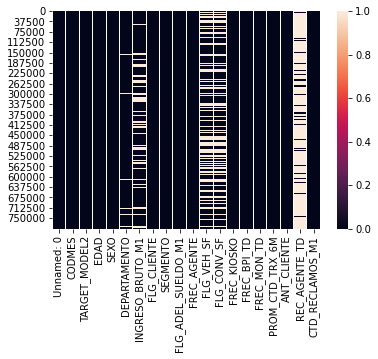

In [5]:
sns.heatmap(Fuga.isnull())

**GRAFICAMOS EL TARGET**

C:\Users\FIORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


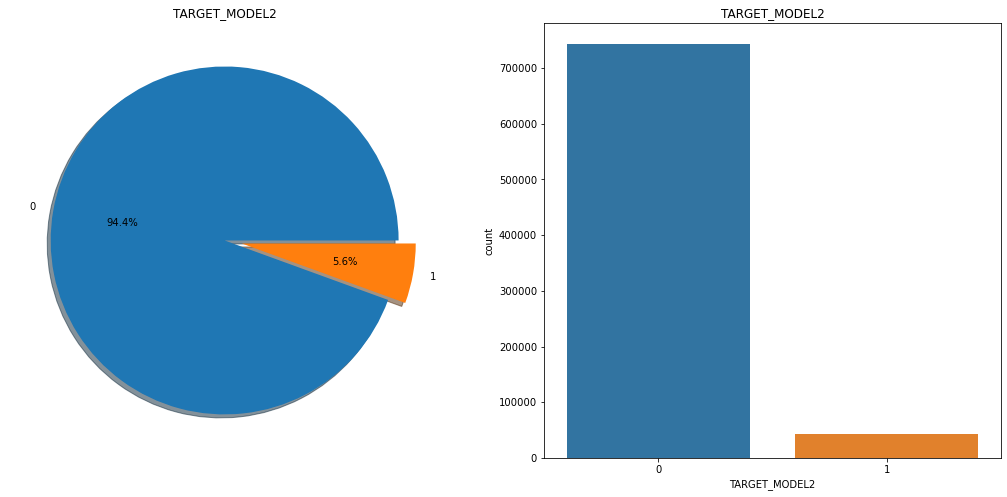

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
Fuga['TARGET_MODEL2'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TARGET_MODEL2')
ax[0].set_ylabel('')
sns.countplot('TARGET_MODEL2',data=Fuga,ax=ax[1])
ax[1].set_title('TARGET_MODEL2')
plt.show()

**OBSERVAMOS EN PORCENTAJES EL TARGET**

In [7]:
count_no_sub=len(Fuga[Fuga['TARGET_MODEL2']==0])
count_sub=len(Fuga[Fuga['TARGET_MODEL2']==1])
pct_of_no_sub=count_no_sub/(count_no_sub + count_sub)
print("porcentaje de no fuga",pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub + count_sub)
print("porcentaje de fuga",pct_of_sub*100)

porcentaje de no fuga 94.44491711058483
porcentaje de fuga 5.5550828894151705


**GRAFICAMOS EL TARGET RESPECTO AL SEXO**

<AxesSubplot:xlabel='SEXO', ylabel='count'>

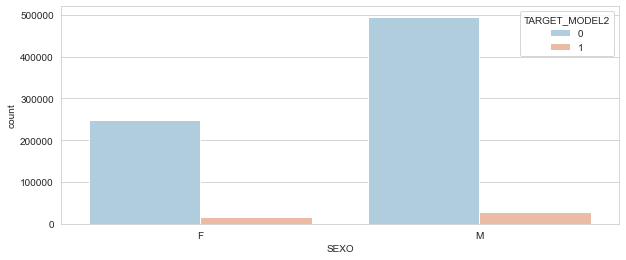

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,4))
sns.countplot(x='SEXO',hue='TARGET_MODEL2',data=Fuga,palette='RdBu_r')

<AxesSubplot:xlabel='FREC_BPI_TD', ylabel='count'>

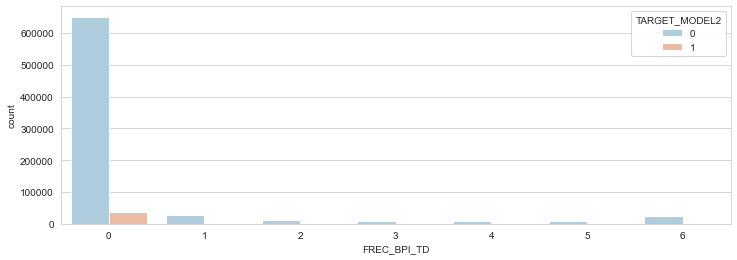

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
sns.countplot(x='FREC_BPI_TD',hue='TARGET_MODEL2',data=Fuga,palette='RdBu_r')

<AxesSubplot:xlabel='FLG_ADEL_SUELDO_M1', ylabel='count'>

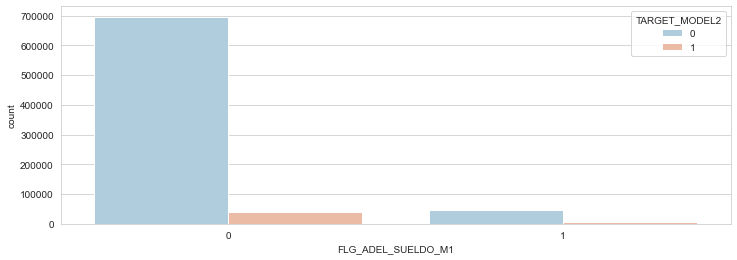

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
sns.countplot(x='FLG_ADEL_SUELDO_M1',hue='TARGET_MODEL2',data=Fuga,palette='RdBu_r')

**COMPORTAMIENTO DE LA EDAD**

C:\Users\FIORE\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EDAD'>

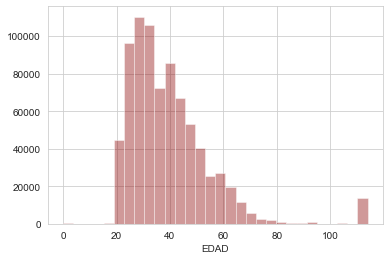

In [11]:
 sns.distplot(Fuga['EDAD'].dropna(),kde=False,color='darkred',bins=30)

## TRATAMIENTO DE DATOS

**IMPUTACIONES**

- **Inicialmente tenemos:**

<AxesSubplot:>

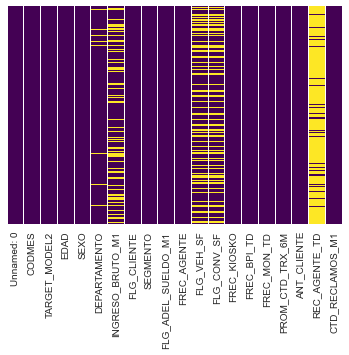

In [12]:
sns.heatmap(Fuga.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
Fuga['DEPARTAMENTO'] = Fuga['DEPARTAMENTO'].fillna(Fuga['DEPARTAMENTO'].mode()[0])
Fuga['INGRESO_BRUTO_M1'] = Fuga['INGRESO_BRUTO_M1'].fillna(Fuga['INGRESO_BRUTO_M1'].mean())
Fuga['FLG_VEH_SF'] = Fuga['FLG_VEH_SF'].fillna(Fuga['FLG_VEH_SF'].mode()[0])
Fuga['FLG_CONV_SF'] = Fuga['FLG_CONV_SF'].fillna(Fuga['FLG_CONV_SF'].mode()[0])
Fuga['ANT_CLIENTE'] = Fuga['ANT_CLIENTE'].fillna(Fuga['ANT_CLIENTE'].mean())

<AxesSubplot:>

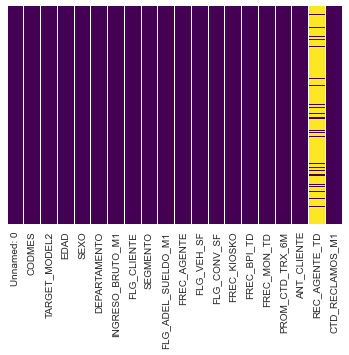

In [14]:
sns.heatmap(Fuga.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**ELIMINAMOS VARIABLES QUE NO APORTAN AL MODELO**

In [15]:
Fuga.drop(['Unnamed: 0','CODMES','REC_AGENTE_TD'],axis=1,inplace=True)

In [16]:
Fuga.drop(['SEGMENTO','PROM_CTD_TRX_6M','DEPARTAMENTO'],axis=1,inplace=True)

- **Podemos observar que nuestra data ya no tiene datos nulos**

<AxesSubplot:>

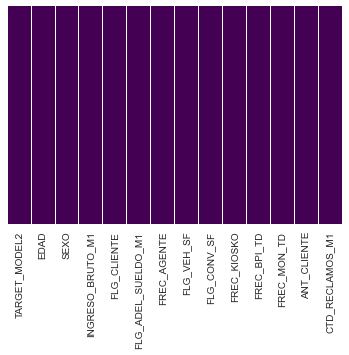

In [17]:
sns.heatmap(Fuga.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## GENERAMOS DUMMIES

In [18]:
Fuga

,TARGET_MODEL2,EDAD,SEXO,INGRESO_BRUTO_M1,FLG_CLIENTE,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_VEH_SF,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,FREC_MON_TD,ANT_CLIENTE,CTD_RECLAMOS_M1
0,0,46,F,2565.256405,NO CLIENTE,0,0,0.0,0.0,0,0,0,224.0,0
1,0,54,M,4718.000000,CLIENTE,0,0,0.0,1.0,0,0,0,123.0,0
2,0,81,M,2565.256405,CLIENTE,0,0,0.0,0.0,0,0,0,264.0,0
3,0,42,M,936.000000,CLIENTE,0,0,0.0,0.0,0,0,0,263.0,0
4,0,52,M,5844.000000,CLIENTE,0,0,0.0,0.0,0,0,0,263.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787490,0,70,M,2449.000000,CLIENTE,0,0,0.0,1.0,0,0,0,77.0,0
787491,0,44,F,4827.000000,CLIENTE,0,0,0.0,0.0,1,0,0,35.0,0
787492,1,33,F,7005.000000,CLIENTE,0,0,1.0,0.0,0,0,0,62.0,0
787493,0,30,M,966.000000,CLIENTE,0,0,0.0,0.0,4,0,1,10.0,0


In [19]:
Fuga = pd.get_dummies(Fuga, columns=['SEXO','FLG_CLIENTE']) 


In [20]:
Fuga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787495 entries, 0 to 787494
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TARGET_MODEL2           787495 non-null  int64  
 1   EDAD                    787495 non-null  int64  
 2   INGRESO_BRUTO_M1        787495 non-null  float64
 3   FLG_ADEL_SUELDO_M1      787495 non-null  int64  
 4   FREC_AGENTE             787495 non-null  int64  
 5   FLG_VEH_SF              787495 non-null  float64
 6   FLG_CONV_SF             787495 non-null  float64
 7   FREC_KIOSKO             787495 non-null  int64  
 8   FREC_BPI_TD             787495 non-null  int64  
 9   FREC_MON_TD             787495 non-null  int64  
 10  ANT_CLIENTE             787495 non-null  float64
 11  CTD_RECLAMOS_M1         787495 non-null  int64  
 12  SEXO_F                  787495 non-null  uint8  
 13  SEXO_M                  787495 non-null  uint8  
 14  FLG_CLIENTE_CLIENTE 

**COMPONENTES PRINCIPALES**

**IMPORTAMOS**

In [21]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


In [22]:
import statsmodels.api as sm

- PROCESAMOS EL MODELO

In [23]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

- VARIABLES NUMERICAS

In [24]:
numerico=['EDAD','INGRESO_BRUTO_M1','ANT_CLIENTE']

In [25]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
Fuga[numerico].mean(axis=0)

----------------------
Media de cada variable
----------------------


EDAD                  39.250776
INGRESO_BRUTO_M1    2565.256405
ANT_CLIENTE          105.254629
dtype: float64

In [26]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
Fuga[numerico].var(axis=0)


-------------------------
Varianza de cada variable
-------------------------


EDAD                2.481565e+02
INGRESO_BRUTO_M1    8.370534e+06
ANT_CLIENTE         2.516696e+04
dtype: float64

- MODELO PCA

In [27]:
pca_pipe = make_pipeline(StandardScaler(), PCA())


In [28]:
pca_pipe.fit(Fuga[numerico])

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

- Se extrae el modelo entrenado del pipeline

In [29]:
modelo_pca = pca_pipe.named_steps['pca']

- Se combierte el array a dataframe para añadir nombres a los ejes.

In [30]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = Fuga[numerico].columns,
    index   = ['PC1', 'PC2', 'PC3']
)

,EDAD,INGRESO_BRUTO_M1,ANT_CLIENTE
PC1,0.660908,0.396780,0.636998
PC2,-0.201757,0.911494,-0.358430
PC3,-0.722838,0.108370,0.682467


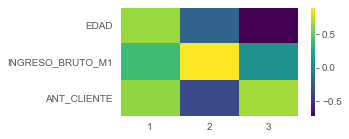

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(Fuga[numerico].columns)), Fuga[numerico].columns)
plt.xticks(range(len(Fuga[numerico].columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

- Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.44911278 0.31273953 0.23814769]


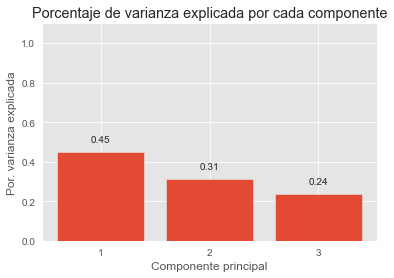

In [32]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(Fuga[numerico].columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');


- En este caso, la primera componente explica el 45% de la varianza observada en los datos y la segunda el 31%.

- Porcentaje de varianza explicada acumulada

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.44911278 0.76185231 1.        ]


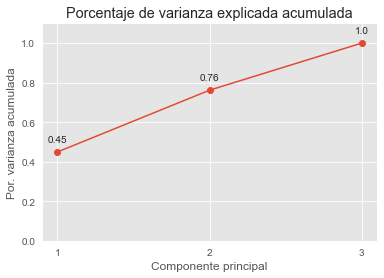

In [33]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(Fuga[numerico].columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(Fuga[numerico].columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

- Proyección de las observaciones de entrenamiento

In [34]:
proyecciones = pca_pipe.transform(X=Fuga[numerico])
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3'],
    index   = Fuga[numerico].index
)
proyecciones.head()

,PC1,PC2,PC3
0,0.759964,-0.354732,0.201144
1,0.985283,0.449224,-0.519805
2,2.388984,-0.893373,-1.232781
3,0.525304,-0.904913,0.491437
4,1.617946,0.513270,0.216418


In [35]:
proyecciones.shape

(787495, 3)

In [36]:
fuga = pd.concat([Fuga, proyecciones], axis = 1)


In [37]:
fuga.drop(['PC3','EDAD','INGRESO_BRUTO_M1','ANT_CLIENTE'],axis=1,inplace=True)

In [38]:
fuga.head()

,TARGET_MODEL2,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_VEH_SF,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,FREC_MON_TD,CTD_RECLAMOS_M1,SEXO_F,SEXO_M,FLG_CLIENTE_CLIENTE,FLG_CLIENTE_NO CLIENTE,PC1,PC2
0,0,0,0,0.0,0.0,0,0,0,0,1,0,0,1,0.759964,-0.354732
1,0,0,0,0.0,1.0,0,0,0,0,0,1,1,0,0.985283,0.449224
2,0,0,0,0.0,0.0,0,0,0,0,0,1,1,0,2.388984,-0.893373
3,0,0,0,0.0,0.0,0,0,0,0,0,1,1,0,0.525304,-0.904913
4,0,0,0,0.0,0.0,0,0,0,0,0,1,1,0,1.617946,0.513270


**BALANCEO DE DATOS**

In [39]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
y=fuga['TARGET_MODEL2']
X=fuga.drop(['TARGET_MODEL2'],axis=1)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

- Contamos:

In [44]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0: 520549, 1: 30697})


- Balanceo:

In [45]:
os = SMOTE(random_state = 0)

In [46]:
os_data_X, os_data_y = os.fit_resample(X_train.values, y_train.values)

In [47]:
counter = Counter(os_data_y)
print(counter)

Counter({0: 520549, 1: 520549})


## MODELO GAM

In [48]:
pip install pygam

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd        
from pygam import LogisticGAM


In [50]:
#y=fuga['TARGET_MODEL2']
#X=fuga.drop(['TARGET_MODEL2'],axis=1)

In [51]:
from pygam import LogisticGAM
import numpy as np
from pygam import LogisticGAM
        


In [52]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [53]:
lambda_ = 0.6
n_splines = 6
constraints = None
gam = LogisticGAM(constraints=constraints, 
          lam=lambda_,
         n_splines=n_splines,max_iter=250,tol=0.0001,).fit(os_data_X, os_data_y)

C:\Users\FIORE\anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\FIORE\anaconda3\lib\site-packages\pygam\pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *


In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [55]:
lambda_vector=[0.1,0.25,0.3]
n_splines_vector =[6,20]

In [56]:
 model= gam.gridsearch(os_data_X,os_data_y.ravel(),lam=lambda_vector,n_splines=n_splines_vector)

  0% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--C:\Users\FIORE\anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\FIORE\anaconda3\lib\site-packages\pygam\pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
 16% (1 of 6) |####                      | Elapsed Time: 0:00:41 ETA:   0:03:27C:\Users\FIORE\anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\FIORE\anaconda3\lib\site-packages\pygam\pygam.py:591: RuntimeWarning: invalid value encountered in multiply
  return sp.sparse.diags((self.link.gradient(mu, self.distribution)**2 *
 33% (2 of 6) |########                  | Elapsed Time: 0:25:29 ETA:   1:39:13C:\Users\FIORE\anaconda3\lib\site-packages\pygam\li

In [57]:
model.get_params()

{'max_iter': 250,
 'tol': 0.0001,
 'callbacks': [Deviance(), Diffs(), Accuracy()],
 'verbose': False,
 'terms': s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + intercept,
 'fit_intercept': True}

In [58]:
 model.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      80.614
Link Function:                        LogitLink Log Likelihood:                                 -597325.59
Number of Samples:                      1041098 AIC:                                          1194812.4079
                                                AICc:                                         1194812.4209
                                                UBRE:                                               3.1477
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1723
Feature Function                  Lam

<ipython-input-58-5f15418b3570>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  model.summary()


In [59]:
model.tol

0.0001

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
predic = model.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(y_test, predic)))
proba = model.predict_proba(X_test)      
print("Log Loss: {} ".format(log_loss(y_test, proba)))

Accuracy: 0.6654758327019373 
Log Loss: 0.5674768538505792 


In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
predictions = model.predict(X_train)
print("Accuracy: {} ".format(accuracy_score(y_train, predictions)))
probas = model.predict_proba(X_train)      
print("Log Loss: {} ".format(log_loss(y_train, probas)))

Accuracy: 0.6628964201100779 
Log Loss: 0.5687941700011101 


In [68]:
probas[0:5]

array([0.49681982, 0.62632888, 0.63579572, 0.69056683, 0.21850306])

In [63]:
from sklearn.metrics import roc_auc_score
# imprimimos el roc de train y test con la data real y la prediccion de la probabilidad del modelo
print("auc o Roc on training in GAM data : {:.3f}".format(roc_auc_score(y_train, probas)))
print("auc o Roc on testing in GAM data : {:.3f}".format(roc_auc_score(y_test, proba)))

auc o Roc on training in GAM data : 0.677
auc o Roc on testing in GAM data : 0.679


<Figure size 432x288 with 0 Axes>

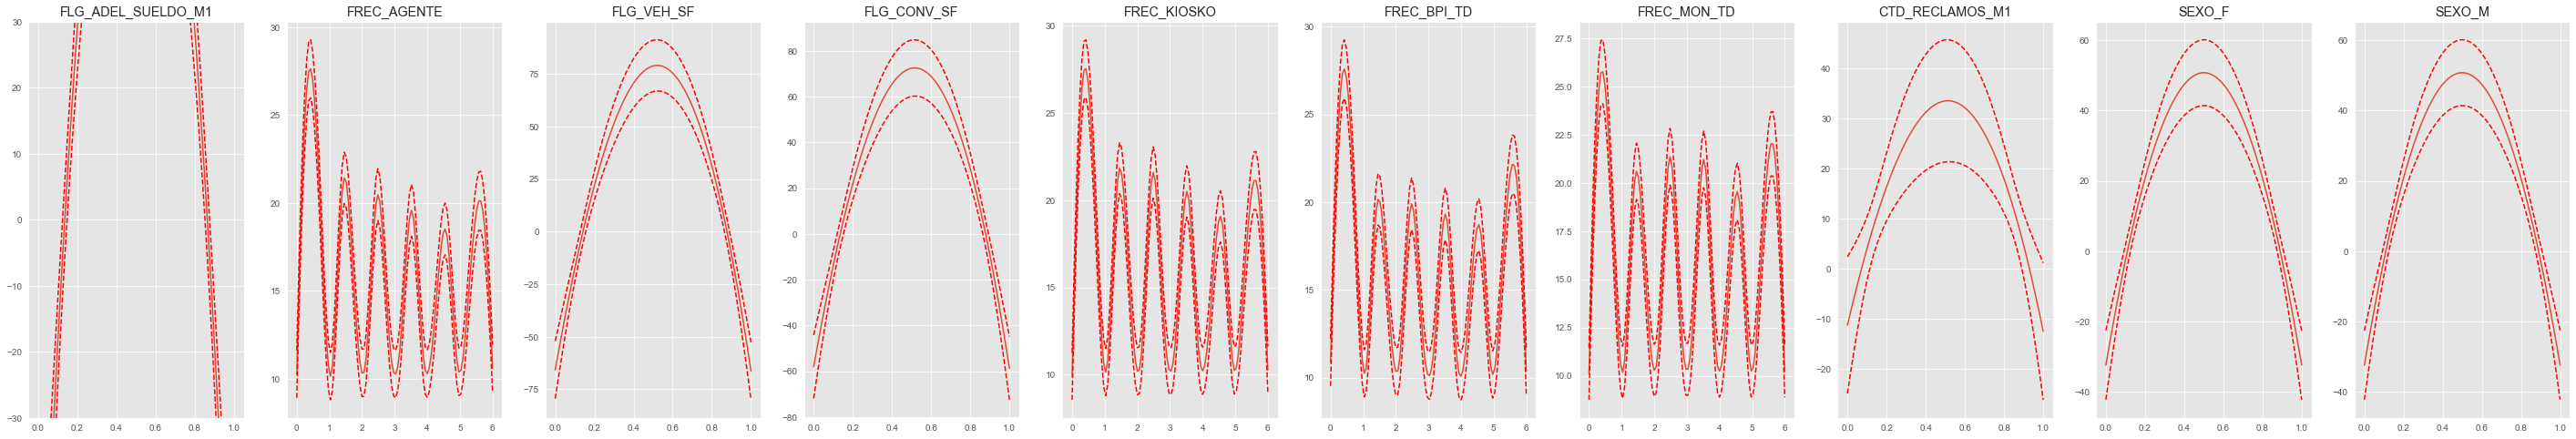

In [64]:
titles = fuga.columns[1:13]
plt.figure()
fig, axs = plt.subplots(1,10,figsize=(50,8))

for i, ax in enumerate(axs):
    XX = model.generate_X_grid(term=i)
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

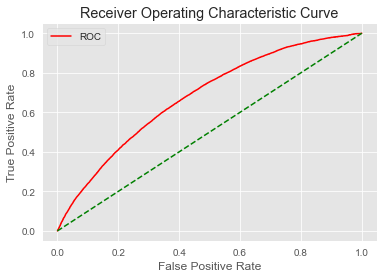

In [196]:
fper, tper, thresholds = roc_curve(y_test, proba)
plot_roc_curve(fper, tper)